In [4]:
import sys
sys.path.insert(0, '../../python_dms/lib/')
from tools_dms import *
from dms import *
from PIL import Image
import scipy.io as sio
import matplotlib.pyplot as plt
import scipy.io
import time 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import os
def SegtoCon_DMS(seg):
    rows,cols = np.shape(seg)
    cont= np.zeros_like(seg)
    y=  np.zeros((rows,cols,2))
    y[:, :, 0] = np.concatenate((seg[:, 1:] - seg[:, 0:-1], np.zeros((rows, 1))),axis=1) / 2.
    y[:, :, 1] = np.concatenate((seg[1:, :] - seg[0:-1, :], np.zeros((1, cols))),axis=0) / 2.
    
    for i in range(rows):
        for j in range(cols):
            if np.abs(y[i,j,0]) > 0 or np.abs(y[i,j,1])>0:
                cont[i,j]=1
#                 im[i,j,:]=0
    return cont

def SegtoCon_DMS(seg):
    rows,cols = np.shape(seg)
    cont= np.zeros_like(seg)
    y=  np.zeros((rows,cols,2))
    y[:, :, 0] = np.concatenate((seg[:, 1:] - seg[:, 0:-1], np.zeros((rows, 1))),axis=1) / 2.
    y[:, :, 1] = np.concatenate((seg[1:, :] - seg[0:-1, :], np.zeros((1, cols))),axis=0) / 2.
    
    for i in range(rows):
        for j in range(cols):
            if np.abs(y[i,j,0]) > 0 or np.abs(y[i,j,1])>0:
                cont[i,j]=1
#                 im[i,j,:]=0
    return cont

pass


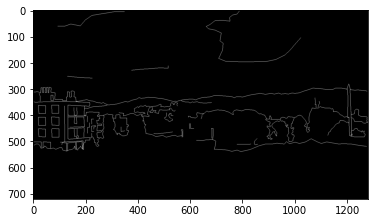

Objective: Jaccard


100%|█████████████████████████████████████████████████████████████| 100/100 [01:53<00:00,  1.14s/it]


Round:  0   0.12235361777074871 beta:   10.0 , lam:   0.01778279410038923
1.0


100%|█████████████████████████████████████████████████████████████| 100/100 [01:57<00:00,  1.18s/it]


Round:  1   0.12611484116644955 beta:   31.622776601683793 , lam:   0.07498942093324558
0.5


100%|█████████████████████████████████████████████████████████████| 100/100 [01:54<00:00,  1.14s/it]


Round:  2   0.12611484116644955 beta:   31.622776601683793 , lam:   0.07498942093324558
0.25


100%|█████████████████████████████████████████████████████████████| 100/100 [02:13<00:00,  1.33s/it]


Round:  3   0.12621716717126258 beta:   31.622776601683793 , lam:   0.05232991146814947
0.125


100%|█████████████████████████████████████████████████████████████| 100/100 [02:08<00:00,  1.29s/it]


Round:  4   0.1264613799389688 beta:   27.384196342643612 , lam:   0.043714448126110896
0.0625




Meaningful r (optimum is in the middle) 5
Total Computation time: 16044.130859613419


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


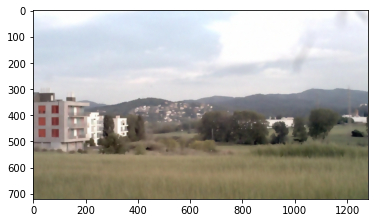

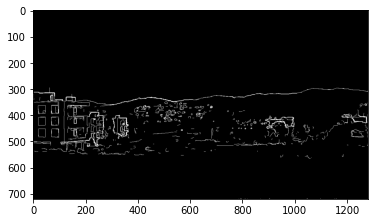

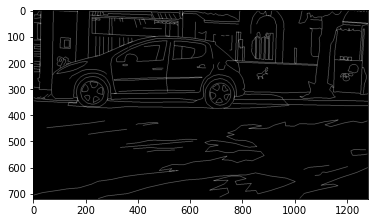

Objective: Jaccard


100%|█████████████████████████████████████████████████████████████| 100/100 [02:04<00:00,  1.24s/it]


Round:  0   0.1209949726119907 beta:   10.0 , lam:   0.01778279410038923
1.0


100%|█████████████████████████████████████████████████████████████| 100/100 [02:08<00:00,  1.28s/it]


Round:  1   0.1209949726119907 beta:   10.0 , lam:   0.01778279410038923
0.5


100%|█████████████████████████████████████████████████████████████| 100/100 [02:05<00:00,  1.26s/it]


Round:  2   0.12173514047719892 beta:   31.622776601683793 , lam:   0.03651741272548377
0.25


 22%|█████████████▋                                                | 22/100 [00:29<01:38,  1.26s/it]

In [ ]:
valid_extensions = ['.jpg', '.jpeg', '.png', '.gif','.mat']  # Add more extensions if needed
np.random.seed(0)
# folder_path= "../../../BSDS500/data/images/train/"
folder_path= "../../../../../Documents/BIPED/edges/imgs/train/rgbr/real/"

idim=0
for filename in os.listdir(folder_path):
    if os.path.splitext(filename)[1].lower() in valid_extensions:
        if idim ==0:
            print('pass')
            idim += 1
            pass
        else:
            image_path = os.path.join(folder_path, filename)
            image_name= os.path.splitext(filename)[0]
            x = np.array(Image.open(image_path))/255.
            r,l,_ = np.shape(x)
            delta= 0.05
            z = x+ delta*np.random.normal(0,1,x.shape)

            edge_file_path = "../../../../../Documents/BIPED/edges/edge_maps/train/rgbr/real/"+image_name+".png"
            cont = np.array(Image.open(edge_file_path))/255.


    #         plt.figure()
    #         plt.imshow(x)
    #         plt.show()
    #         plt.figure()
    #         plt.imshow(z)
    #         plt.show()
            plt.figure()
            plt.imshow(cont,'gray')
            plt.show()
    #         plt.figure()
    #         plt.hist(cont.flatten())
    #         plt.show()
            tab_Jaccard_out,tab_coord_max_Jaccard_out,tab_Jaccard_max,out1,out0= golden_section_map(z,x,cont,bmax=3,bmin=-1,lmax=2,lmin=-3,scale_type='10',
                           grid_size=5,max_round=5,objective='Jaccard',maxiter=100,stop_crit=1e-4,
                                    method='SLPAM',norm_type='l1',eps=2.,eps_AT_min=0.02,A=np.ones((r,l)))
    #         scipy.io.savemat("../../../../Documents/dataset/BSDS500/data/param_dist_Jaccard/train/"+image_name+".mat",dict(tab_Jaccard_out=tab_Jaccard_out,tab_coord_max_Jaccard_out=tab_coord_max_Jaccard_out,tab_Jaccard_max=tab_Jaccard_max,out1=out1,out0=out0))
            scipy.io.savemat("../../dataset/BIPED/data/param_dist_Jaccard/train/"+image_name+".mat",dict(tab_Jaccard_out=tab_Jaccard_out,tab_coord_max_Jaccard_out=tab_coord_max_Jaccard_out,tab_Jaccard_max=tab_Jaccard_max,out1=out1,out0=out0))
            cont_thres = np.ones_like(out0)*(out0>0.5)
    #         
            cont_thres = np.clip(cont_thres[:,:,0]+cont_thres[:,:,1],0,1)
            plt.figure()
            plt.imshow(out1)
            plt.show()
            plt.figure()
            plt.imshow(cont_thres,'gray')
            plt.show()
            idim += 1
    #         if idim ==1:
    #             break




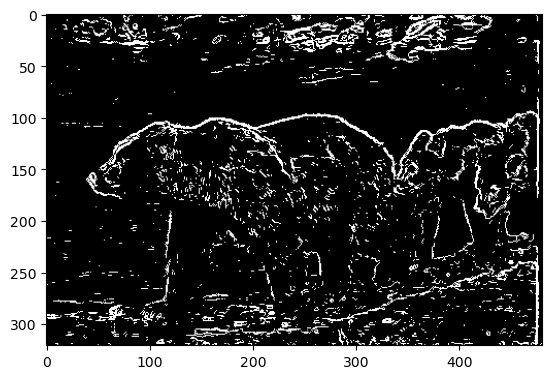

In [41]:
cont_thres = np.ones_like(out0)*(out0>0.2)
# cont_thres = out0

cont_thres = np.clip(cont_thres[:,:,0]+cont_thres[:,:,1],0,1)
plt.figure()
plt.imshow(cont_thres,cmap='gray')
plt.show()

In [38]:
cont_thres

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.50171601],
       [0.        , 0.        , 0.        , ..., 0.        , 0.40681355,
        0.        ]])

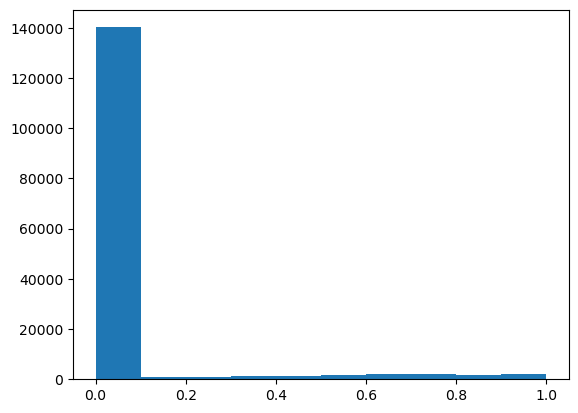

In [39]:
plt.figure()
plt.hist(cont_thres.flatten())
plt.show()